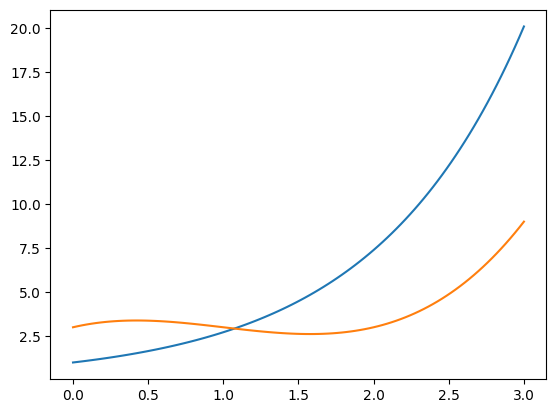

MN yes!
Enter the eps: 0.001
Приближение х методом Ньютона:  1.07383143832858
За количество итераций:  4
MI yes!
Приближение х методом интераций:  1.0737253337483892
За количество итераций:  6



In [ ]:
# Вариант 11  e **x- x**3 + 3*x**2 - 2*x - 3 = 0
import sympy as sym
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import diff, symbols, exp
import sys

# Выводим график
x = np.linspace ( 0 ,3 , 100)
plt.plot (x, math.e ** x)
plt.plot (x, x**3 - 3*x**2 + 2*x +  3)
plt.show()

#a = float(input('Enter the left rod a: '))
#b = float(input('Enter the left rod b: '))
a = 0
b = 2

# Записываем функцию
x = symbols('x')
f = math.e **x- x**3 + 3*x**2 - 2*x - 3
df=diff(f,x)
f_diff2 = diff(diff(f, x),x)

x_new = b
times = 0

############ NT method

#Проверка условия сходимости в методе Ньютона
if f.subs(x, a) * f.subs(x, b) < 0 and f.subs(x,b)* f_diff2.subs(x, b) > 0:
  print('MN yes!')
  eps = float(input('Enter the eps: '))
else:
  print('MN no!')

while True:
  x_temp = x_new
  x_new = x_temp - f.subs(x, x_new) / (df.subs(x, x_new))

  gap = abs( x_new - x_temp)
  times += 1
  if gap < eps:
      break
  elif times >1000:
    print('не сходится при 1000 итераций')
    break
print('Приближение х методом Ньютона: ', x_new)
print('За количество итераций: ', times)

############  Метод простых итераций
times = 0

def phif(x):
  return math.log( x**3 -3 * x**2 + 2*x +3)

def phidf(x):
  return (3*x**2 - 6*x + 2) / (x**3 -3 * x**2 + 2*x +3)

x_new = b
q=phidf(x_new)
if abs(q)<1:
  print('MI yes!')
else:
  print('MI no!')
eps = 0.001
while True:
  x_temp = x_new
  x_new = phif(x_new)
  gap = (abs( x_new - x_temp)) * q / (1-q)
  times += 1
  if gap < eps:
      break
  elif times >1000:
    print('Не сходится при 1000 итераций')
    break
print('Приближение х методом интераций: ', x_new)
print('За количество итераций: ', times)



print( )

<ipython-input-2-a44a339c28d1>:16: RuntimeWarning: invalid value encountered in sqrt
  z2 = x - sqrt(y+1) + 1


Enter interval for x1
0 2
Enter interval for x2
0 2
Enter epsilon: 0.0001
Newton method


<ipython-input-2-a44a339c28d1>:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  jacobi_inversed = np.linalg.inv(np.array(jacobi))


UFuncTypeError: ignored

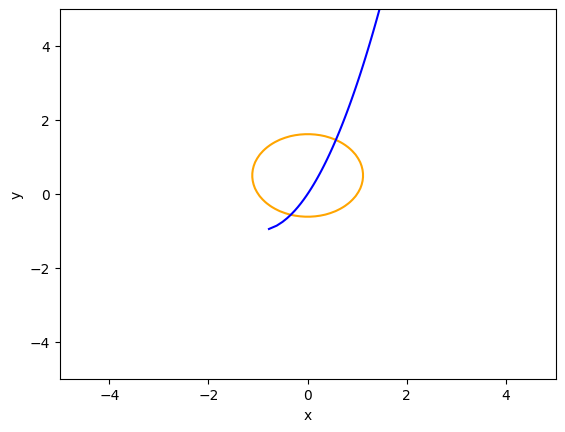

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy import sqrt

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

z1 = x**2 - y + y**2 - 1
plt.contour(x, y, z1, levels=[0], colors=['orange'])

z2 = x - sqrt(y+1) + 1
plt.contour(x, y, z2, levels=[0], colors=['blue'])

def f1(x):
  return x[0]**2 - x[1] + x[1]**2 - 1

def f2(x):
   return x[0] - sqrt(x[1]+1) + 1

def df1_dx1(x):
  return 2*x[0]

def df1_dx2(x):
  return -1 + 2*x[1]

def df2_dx1(x):
  return 1

def df2_dx2(x):
  return 1 / (2 * sqrt(x+1))


def phi1(x):
  return sqrt(x[1] - x[1] ** 2 + 1)

def phi2(x):
  return -1 + ( -1 - x[0])**2

def dphi1_dx1(x):
  return 0

def dphi1_dx2(x):
  return (2 * x[1] - 1) * sqrt( - x[1]**2 + x[1] + 1) / (2 * x[1] ** 2 - 2* x[1] - 2)

def dphi2_dx1(x):
  return 2* x[0] + 2

def dphi2_dx2(x):
  return 0


def L_inf_norm(a):
    abs_a = [abs(i) for i in a]
    return max(abs_a)


#q коэффициент для метода итераций
def get_q(interval1, interval2):
    l1, r1 = interval1
    l2, r2 = interval2
    m1 = (l1 + r1) / 2
    m2 = (l2 + r2) / 2
    x1 = m1 + abs(r1 - l1)
    x2 = m2 + abs(r2 - l2)
    max1 = abs(dphi1_dx1([x1, x2])) + abs(dphi1_dx2([x1, x2]))
    max2 = abs(dphi2_dx1([x1, x2])) + abs(dphi2_dx2([x1, x2]))
    return max(max1, max2)


def iteration_method(phi1, phi2, l1, r1, l2, r2, eps):

    x_prev = [(l1 + r1) * 0.5, (l2 + r2) * 0.5]
    intervals = [(l1,r1),(l2,r2)]
    q = get_q(intervals[0], intervals[1])
    iters = 0
    while True:
        iters += 1
        x = [phi1(x_prev), phi2(x_prev)]
        if q / (1 - q) * L_inf_norm([(x[i] - x_prev[i]) for i in range(len(x))]) < eps:
            break
        x_prev = x

    return x, iters


def newton_method(f1, f2, df1_dx1, df1_dx2, df2_dx1, df2_dx2, l1, r1, l2, r2, eps):

    x_prev = np.array([(l1 + r1) / 2, (l2 + r2) / 2])
    jacobi = []
    jacobi.append([df1_dx1(x_prev), df1_dx2(x_prev)])
    jacobi.append([df2_dx1(x_prev), df2_dx2(x_prev)])
    jacobi_inversed = np.linalg.inv(np.array(jacobi))
    iters = 0
    while True:
        iters += 1
        x = x_prev - jacobi_inversed @ np.array([f1(x_prev), f2(x_prev)])
        if L_inf_norm([(x[i] - x_prev[i]) for i in range(len(x))]) < eps:
            break
        x_prev = x

    return x, iters


if __name__ == "__main__":
    print('Enter interval for x1')
    l1, r1 = map(float, input().split())
    print('Enter interval for x2')
    l2, r2 = map(float, input().split())
    eps = float(input('Enter epsilon: '))

    print('Newton method')
    x_newton, i_newton = newton_method(f1, f2, df1_dx1, df1_dx2, df2_dx1, df2_dx2, l1, r1, l2, r2, eps)
    print('x =', x_newton)
    print('Iterations:', i_newton)

    print('Iteration method')
    x_iter, i_iter = iteration_method(phi1, phi2, l1, r1, l2, r2, eps)
    print('x =', x_iter)
    print('Iterations:', i_iter)

    """
For input:
0 2
2 4
0.0001
"""